In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt



In [2]:
data = {
    'Revenu Mensuel (EUR)': [7800],
    'Patrimoine de départ (EUR)': [256000],
    'Dépenses (EUR)': [4000],
    'Taux Rendement Réel (%)': [5],
    'Hypothèse de rente (%)': [4],
}
df = pd.DataFrame(data)

In [3]:
df['Taux d\'épargne (%)'] =  ( ( df['Revenu Mensuel (EUR)'] - df['Dépenses (EUR)']) / df['Revenu Mensuel (EUR)'] * 100)


# Calcul du montant à épargner pour devenir rentier
df['Montant à épargner pour devenir rentier (EUR)'] = (df['Dépenses (EUR)'] * 12) / (df['Hypothèse de rente (%)'] / 100)

# Calcul du patrimoine par année en utilisant les intérêts composés
montant_final = df['Montant à épargner pour devenir rentier (EUR)'].iloc[0]
taux_rendement = df['Taux Rendement Réel (%)'].iloc[0] / 100
epargne_annuelle = (df['Revenu Mensuel (EUR)'] * df['Taux d\'épargne (%)'] / 100).iloc[0] * 12
patrimoine = df['Patrimoine de départ (EUR)'].iloc[0]

annees = [0]
patrimoines = [patrimoine]

while patrimoine < montant_final:
    patrimoine += epargne_annuelle  # Ajouter l'épargne annuelle
    patrimoine *= (1 + taux_rendement)  # Appliquer les intérêts composés
    annees.append(annees[-1] + 1)
    patrimoines.append(patrimoine)
df['Nombre d\'années'] = annees[-1]


In [4]:
# Styling
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

styled_df = df.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['Revenu Mensuel (EUR)', 'Dépenses (EUR)']])
display(styled_df)

,Revenu Mensuel (EUR),Patrimoine de départ (EUR),Dépenses (EUR),Taux Rendement Réel (%),Hypothèse de rente (%),Taux d'épargne (%),Montant à épargner pour devenir rentier (EUR),Nombre d'années
0,7800,256000,4000,5,4,48.717949,1200000.000000,12


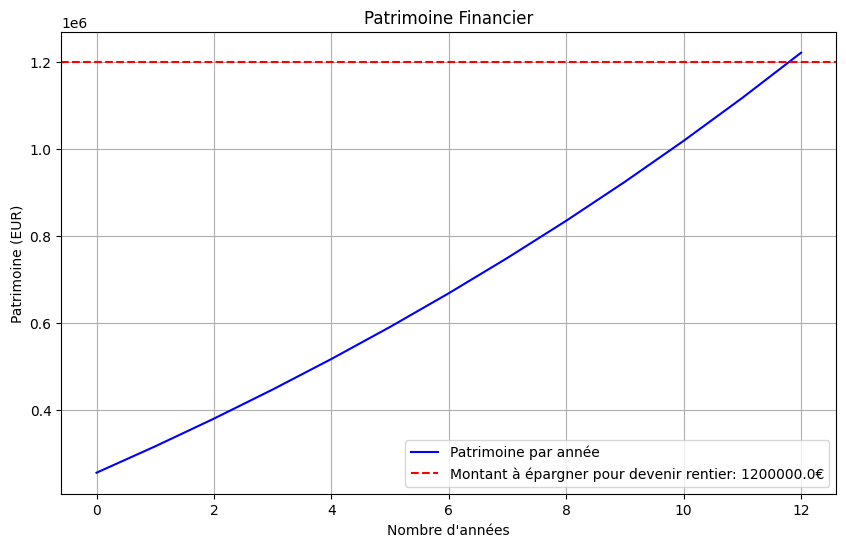

In [5]:
# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(annees, patrimoines, label='Patrimoine par année', color='blue')
plt.axhline(y=montant_final, color='r', linestyle='--', label=f'Montant à épargner pour devenir rentier: {montant_final}€')
plt.title('Patrimoine Financier')
plt.xlabel('Nombre d\'années')
plt.ylabel('Patrimoine (EUR)')
plt.legend()
plt.grid(True)
plt.show()